# Nicolas Bataille
26/09/2021\
Student number : 2131029

In [37]:
#Imports of needed packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# The dataset used is as followed :

*   50 Samples from each of the 3 species of Iris flowers (Iris setosa, iris virginica and Iris versicolor)
*   4 features are represented :

  1.   The length of the sepals (in cm)
  2.   The width of the sepals (in cm)
  3.   The length of the petals (in cm)
  4.   The width of the petals (in cm)

The `Iris_labels.npy` file contains the species name for each of the 50 samples of datas in the `Iris_data.npy` file.

# Task 2.1

In [2]:
#Loading both npy files
irisData = np.load('Data/Iris_data.npy')
irisLabels = np.load('Data/Iris_labels.npy')


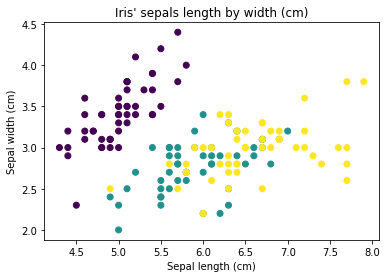

In [3]:
#Plotting the datas using the labels for the colors
plt.figure()
#Using the length and width of the sepals as the x and y features


plt.scatter(irisData[:,0],
            irisData[:,1],
            c = irisLabels
            )

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title("Iris' sepals length by width (cm)")

plt.show()


# Task 2.2

##### The following code is an application of the Kmeans class of scikit-learn on the Fisher Iris data.
##### We first create a kmeans initialised with 3 clusters. We fit the model to the Fisher Iris Data, make it produce a prediction of cluster membership for each samples of the dataset.

In [24]:
# Initialization of the K-Means object with 3 clusters
kmeans = KMeans(n_clusters = 3)

# Configure the model to use the 4 features given in the dataset
kmeans.n_features_in_ = 4

# Make the model fit to the dataset
kmeans.fit(irisData)
# Make the model predict the cluster membership of each samples
kmeansPredict = kmeans.predict(irisData)

###### Then we plot the prediction to show the 3 clusters, as well as their centroids.

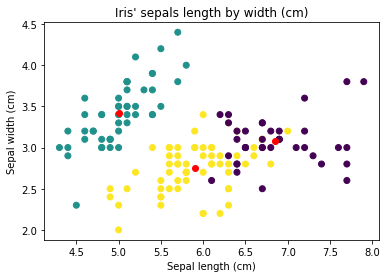

In [36]:
#Plotting the datas using the labels for the colors
plt.figure()
#Using the length and width of the sepals as the x and y features


plt.scatter(irisData[:,0],
            irisData[:,1],
            c = kmeansPredict
            )

#Scatter the centroids of each clusters
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],
           c = 'r'
          )

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title("Iris' sepals length by width (cm)")

plt.show()

# Task 2.3

##### The following code is an application of the Gaussian Mixture class of scikit-learn on the Fisher Iris data.
##### We first create a GMM (Gaussian Mixture Model) initialised with 3 components (= number of clusters wanted), as well as the method (K-Means or random) used for initializing the parameters (weights, means and precision) of the model. We fit the model to the Fisher Iris Data, make it produce a prediction of cluster membership for each samples of the dataset.

In [199]:
#Initialization of a GaussianMixture object with 3 components and the
#K-means initialization method for the parameters
gaussian = GaussianMixture(n_components = 3, init_params = 'kmeans')

#Fitting the model to the Fisher Iris data
gaussian = gaussian.fit(irisData)

#Produce a prediction of cluster membership for the samples
gaussianPredict = gaussian.predict(irisData)

##### Then we plot the result of the prediction, with each clusters represented by a colour and its corresponding centroid

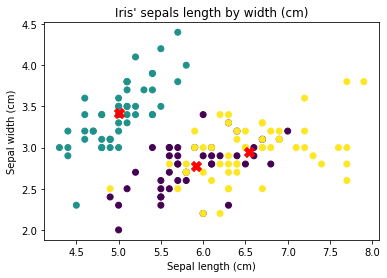

In [166]:
#Plotting the datas using the labels for the colors
plt.figure()

#Using the length and width of the sepals as the x and y features
#We use our prediction to allocate each samples to a component
plt.scatter(irisData[:,0],
            irisData[:,1],
            c = gaussianPredict
            )

#Scatter the centroids of each clusters
plt.scatter(gaussian.means_[:,0],
            gaussian.means_[:,1],
            c = 'r',
            marker='X',
            s = 100,
          )

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title("Iris' sepals length by width (cm)")

plt.show()

###### Here we predict the posterior probabilities for each data points, then plot the result of the prediction for each components of our model.

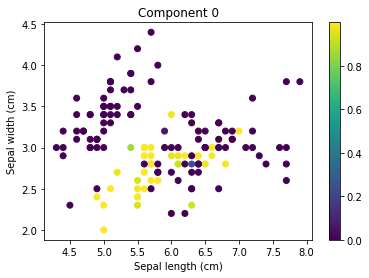

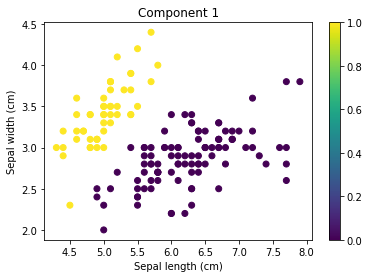

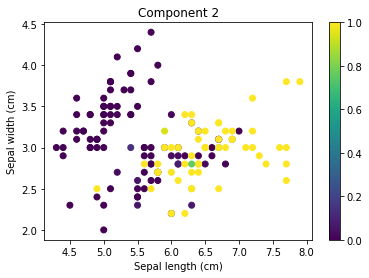

In [200]:
#gaussianProba is an array of the following shape : 
# [n_samples, n_components]
gaussianProba = gaussian.predict_proba(irisData)

#for loop used to plot every given components
# for i in range(gaussianProba[0].size):
#     plt.subplot()
#     plt.scatter(irisData[:,0],
#             irisData[:,1],
#             c = gaussianProba[:,i]
#            )
    
#     plt.title("Component")
#     plt.colorbar()
#     print("test ",i)
# plt.show()

#Plotting every components manually (can't use the for loop
# to iterate on the title for each plot for some reason)

#Plotting the first component
plt.figure()
plt.scatter(irisData[:,0],
            irisData[:,1],
            c = gaussianProba[:,0]
           )
plt.colorbar()
plt.title("Component 0")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Plotting the second component
plt.figure()
plt.scatter(irisData[:,0],
            irisData[:,1],
            c = gaussianProba[:,1]
           )
plt.colorbar()
plt.title("Component 1")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Plotting the second component
plt.figure()
plt.scatter(irisData[:,0],
            irisData[:,1],
            c = gaussianProba[:,2]
           )
plt.colorbar()
plt.title("Component 2")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

The init_params parameter in the GMM constructor allow us to choose between the kmeans method and the random method for initializing the weights, the means and the precision of the model.\
Here is an example of a model using the random initialization method :

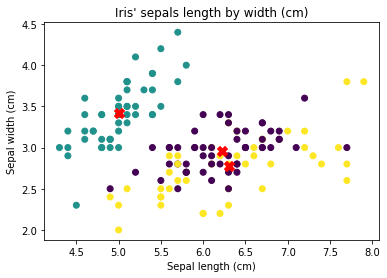

In [207]:
#Initialization of a GaussianMixture object with 3 components and the
#random initialization method for the parameters
gaussianRandom = GaussianMixture(n_components = 3, init_params = 'random')

#Fitting the model to the Fisher Iris data
gaussianRandom = gaussianRandom.fit(irisData)

#Produce a prediction of cluster membership for the samples
gaussianPredict = gaussianRandom.predict(irisData)

#Plotting the datas using the labels for the colors
plt.figure()

#Using the length and width of the sepals as the x and y features
#We use our prediction to allocate each samples to a component
plt.scatter(irisData[:,0],
            irisData[:,1],
            c = gaussianPredict
            )

#Scatter the centroids of each clusters
plt.scatter(gaussianRandom.means_[:,0],
            gaussianRandom.means_[:,1],
            c = 'r',
            marker='X',
            s = 100,
          )

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title("Iris' sepals length by width (cm)")

plt.show()

# Task 2.4

In [47]:
data = np.load('Data/task2_4.npy')

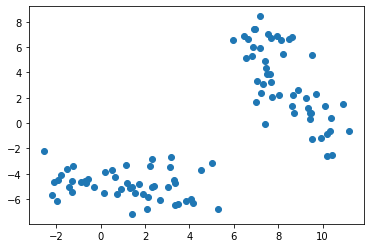

In [50]:
plt.figure()

plt.scatter(data[:,0],
            data[:,1])

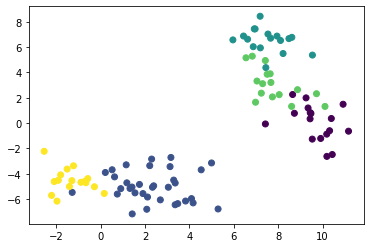

In [75]:
#Clustering with K-Means method
dataKmeans = KMeans(n_clusters = 5)
dataKmeans.n_features_in_ = 2
dataKmeans.fit(data)
dataKmeansPredict = dataKmeans.predict(data)

plt.figure()

plt.scatter(data[:,0],
            data[:,1],
            c = dataKmeansPredict)

In [ ]:
#Clustering with GMM Method
dataKmeans = KMeans(n_clusters = 5)
dataKmeans.n_features_in_ = 2
dataKmeans.fit(data)
dataKmeansPredict = dataKmeans.predict(data)

plt.figure()

plt.scatter(data[:,0],
            data[:,1],
            c = dataKmeansPredict)